Prodigy Infotech

Author : Parth Goswami

Data Science

Task-02

Task: Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

DataSet Link : https://www.kaggle.com/c/titanic/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
plt.style.use('fivethirtyeight')

In [6]:
train_data=pd.read_csv('Dataset/train.csv')
test_data=pd.read_csv('Dataset/test.csv')

In [7]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_data.isnull().sum()

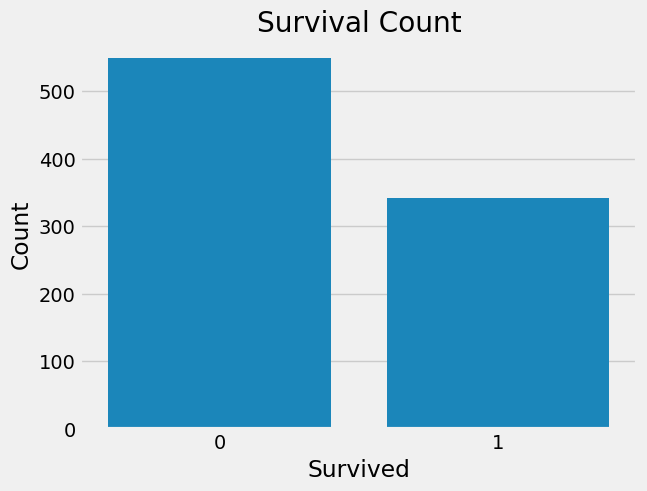

In [9]:
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()
     

In [8]:
train_data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

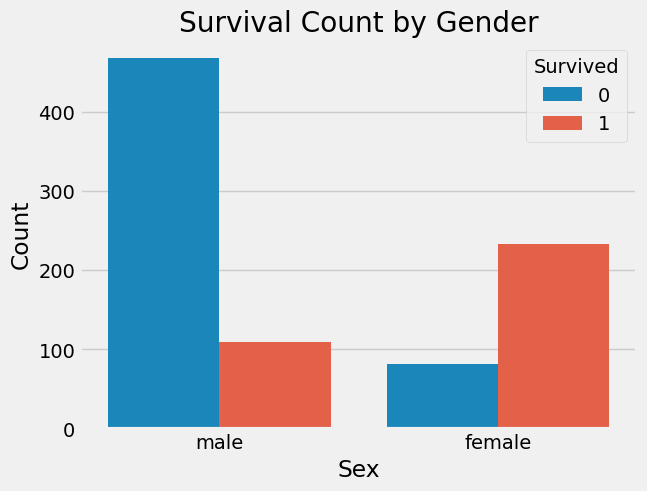

In [10]:
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

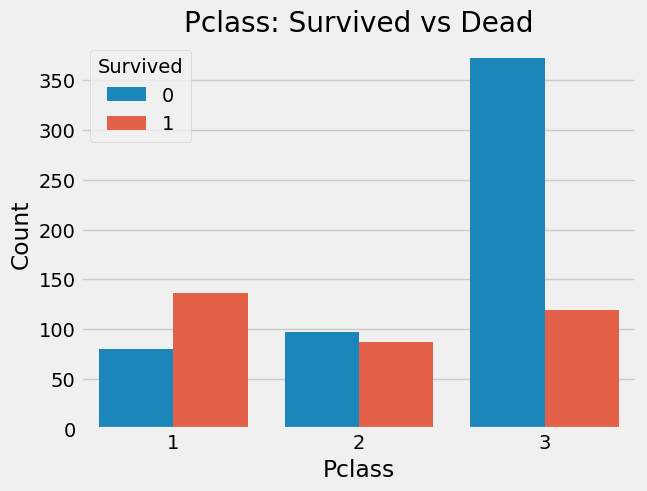

In [11]:
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Pclass: Survived vs Dead')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

In [12]:
pd.crosstab([train_data.Sex,train_data.Survived],train_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')


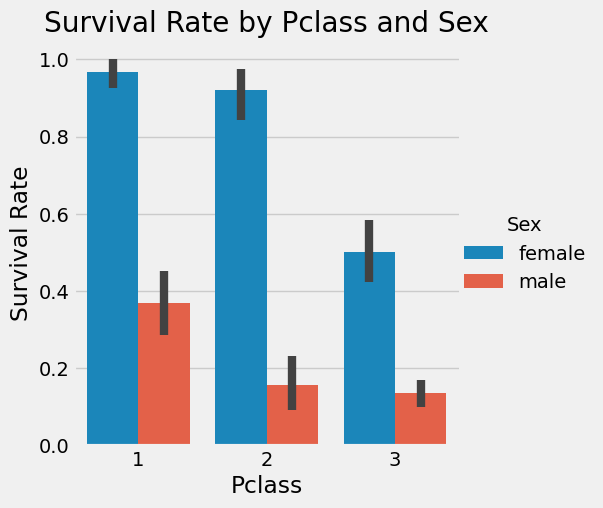

In [13]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train_data, kind='bar')
plt.title('Survival Rate by Pclass and Sex')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

In [14]:
train_data['Initial']=0
for i in train_data:
    train_data['Initial'] = train_data['Name'].str.extract(r'([A-Za-z]+)\.')

In [15]:
pd.crosstab(train_data.Initial,train_data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
train_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [16]:
train_data.groupby('Initial')['Age'].mean()

Initial
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [17]:
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Mr'),'Age']=33
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Mrs'),'Age']=36
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Master'),'Age']=5
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Miss'),'Age']=22
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial=='Other'),'Age']=46
     

In [18]:
train_data.Age.isnull().any()

np.True_

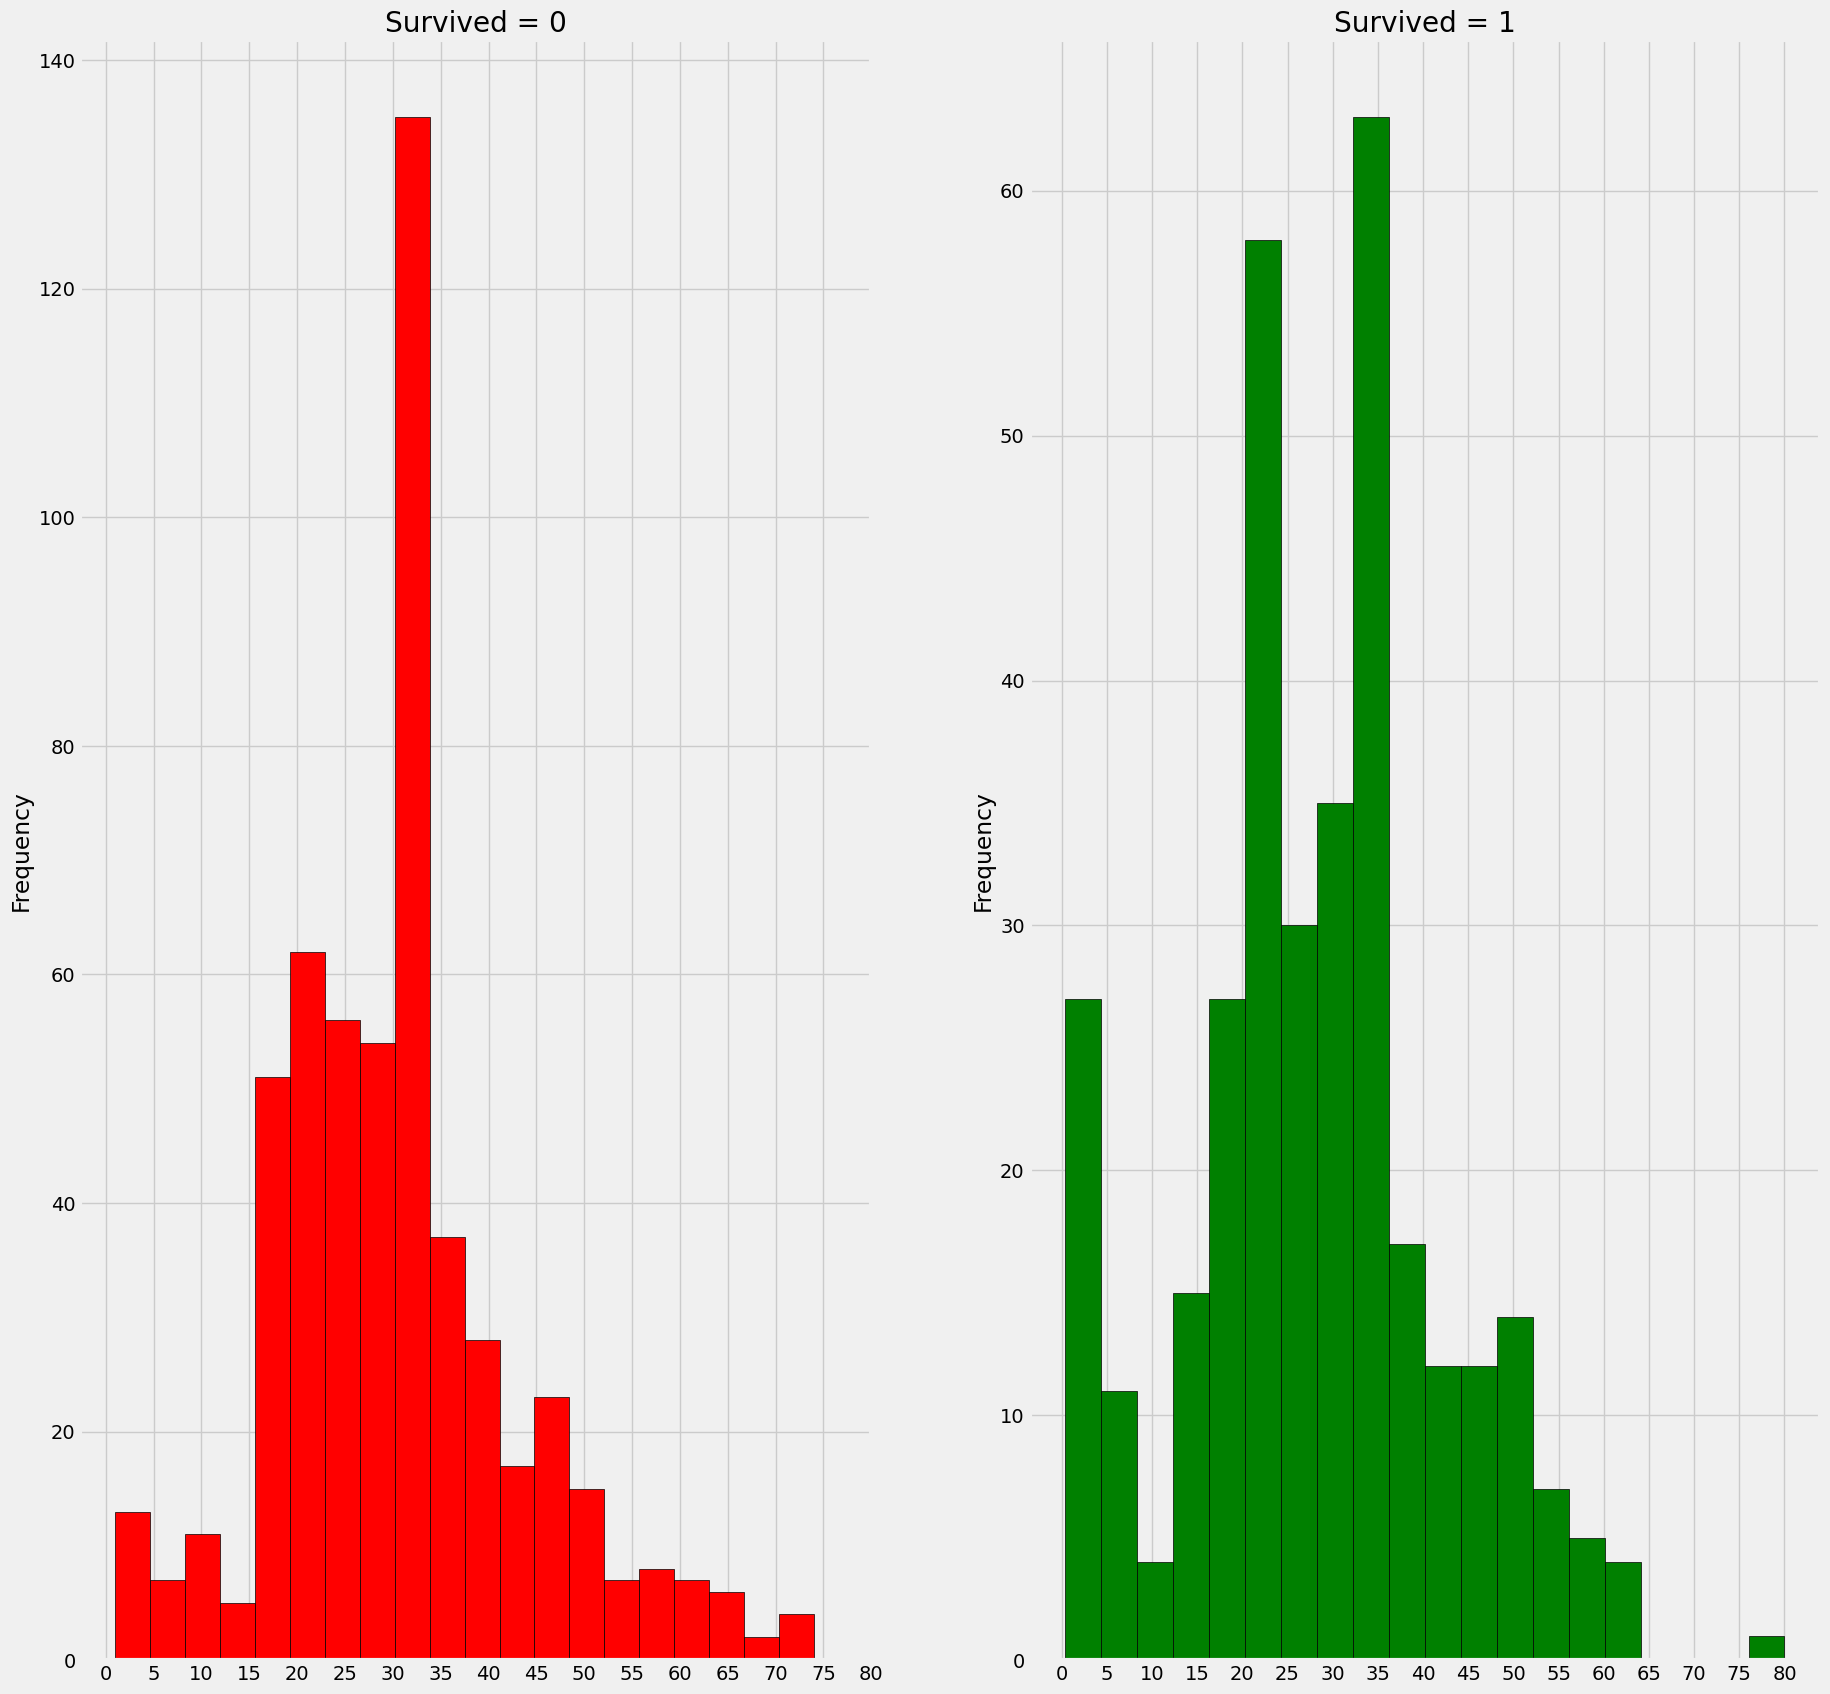

In [19]:
f,ax=plt.subplots(1,2,figsize=(20,20))
train_data[train_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_data[train_data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived = 1')
plt.show()

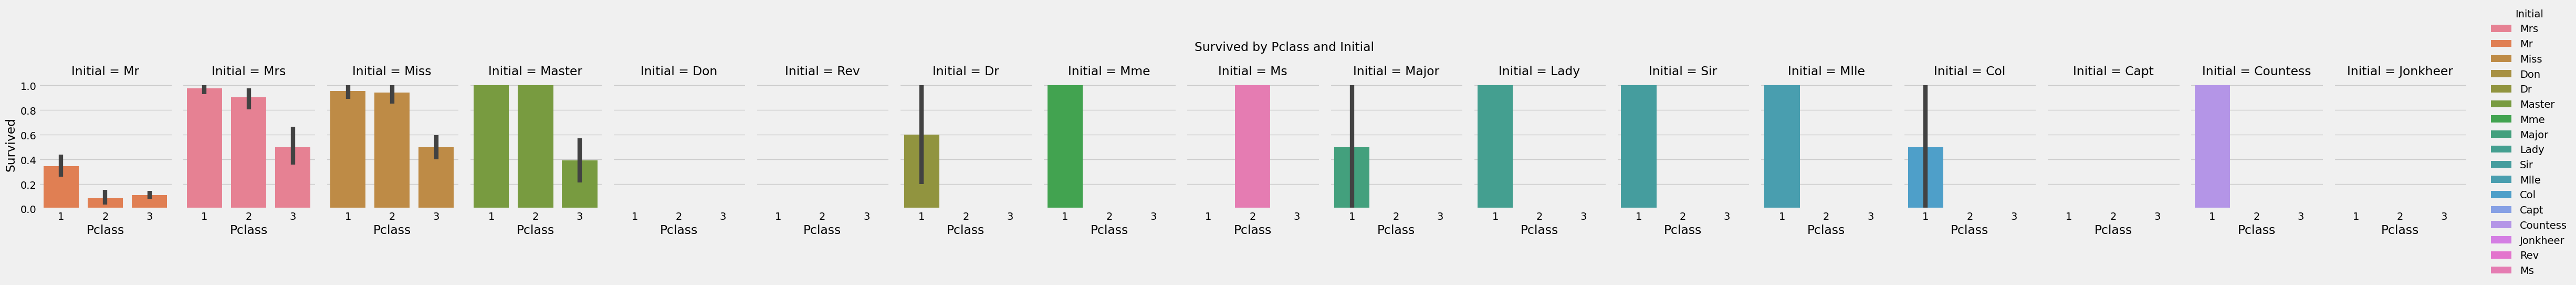

In [20]:
sns.catplot(x='Pclass', y='Survived', hue='Initial', kind='bar', data=train_data, col='Initial', height=4, aspect=0.7)
plt.subplots_adjust(top=0.8)  # Adjust the top space to accommodate the title
plt.suptitle('Survived by Pclass and Initial')
plt.show()

In [21]:
pd.crosstab([train_data.SibSp],train_data.Survived).style.background_gradient('summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


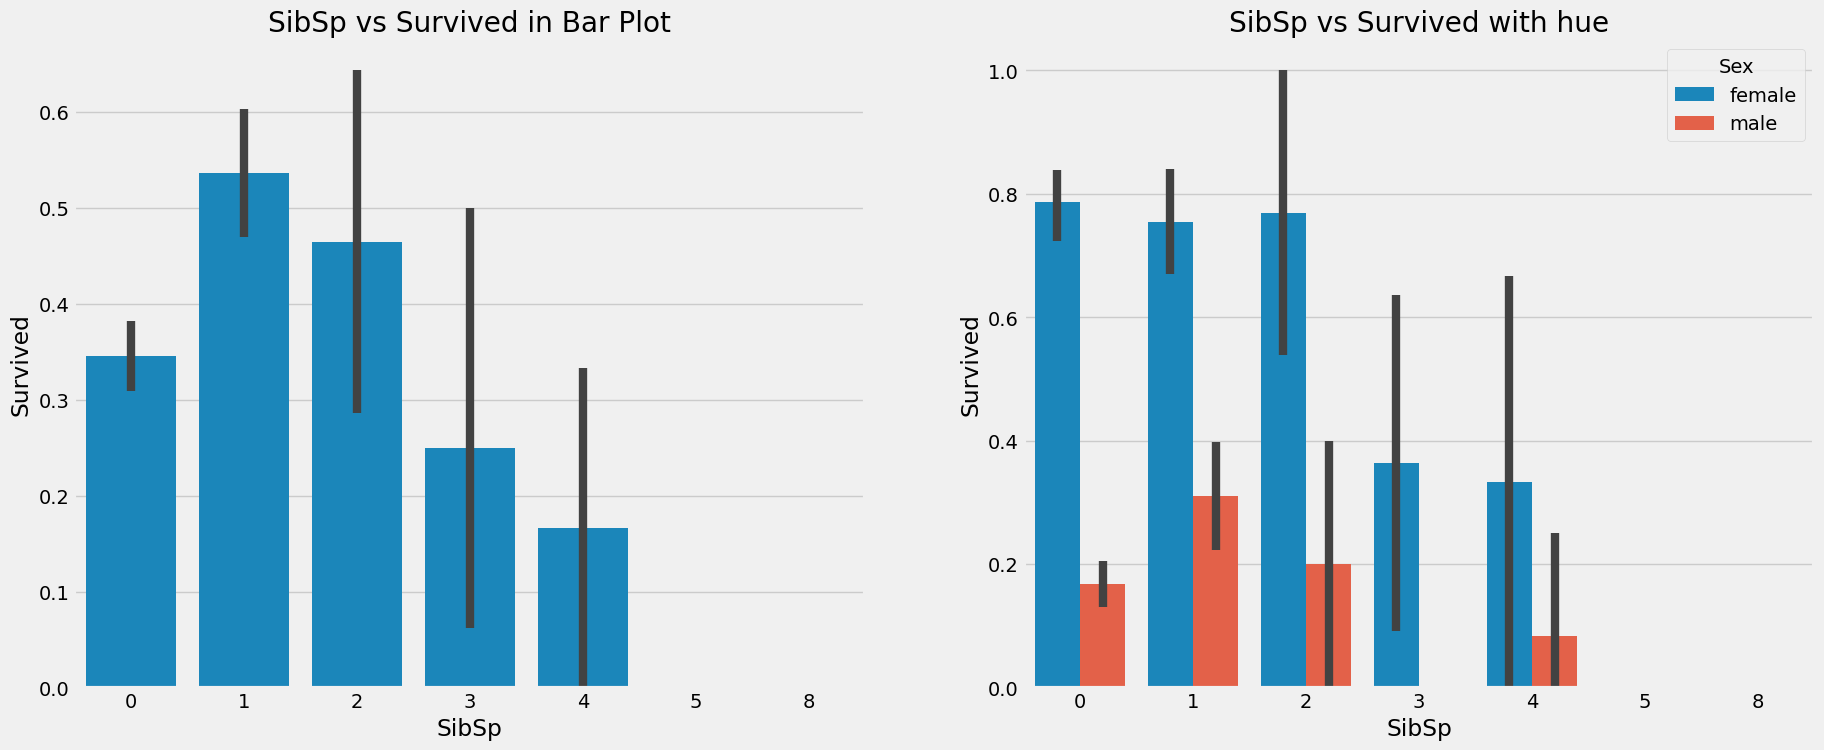

In [22]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Bar plot for SibSp vs Survived (without hue)
sns.barplot(x='SibSp', y='Survived', data=train_data, ax=ax[0])
ax[0].set_title('SibSp vs Survived in Bar Plot')

# Bar plot for SibSp vs Survived (with hue)
sns.barplot(x='SibSp', y='Survived', hue='Sex', data=train_data, ax=ax[1])
ax[1].set_title('SibSp vs Survived with hue')
plt.legend(title='Sex', loc='upper right')  # Add a legend for the hue

plt.show()

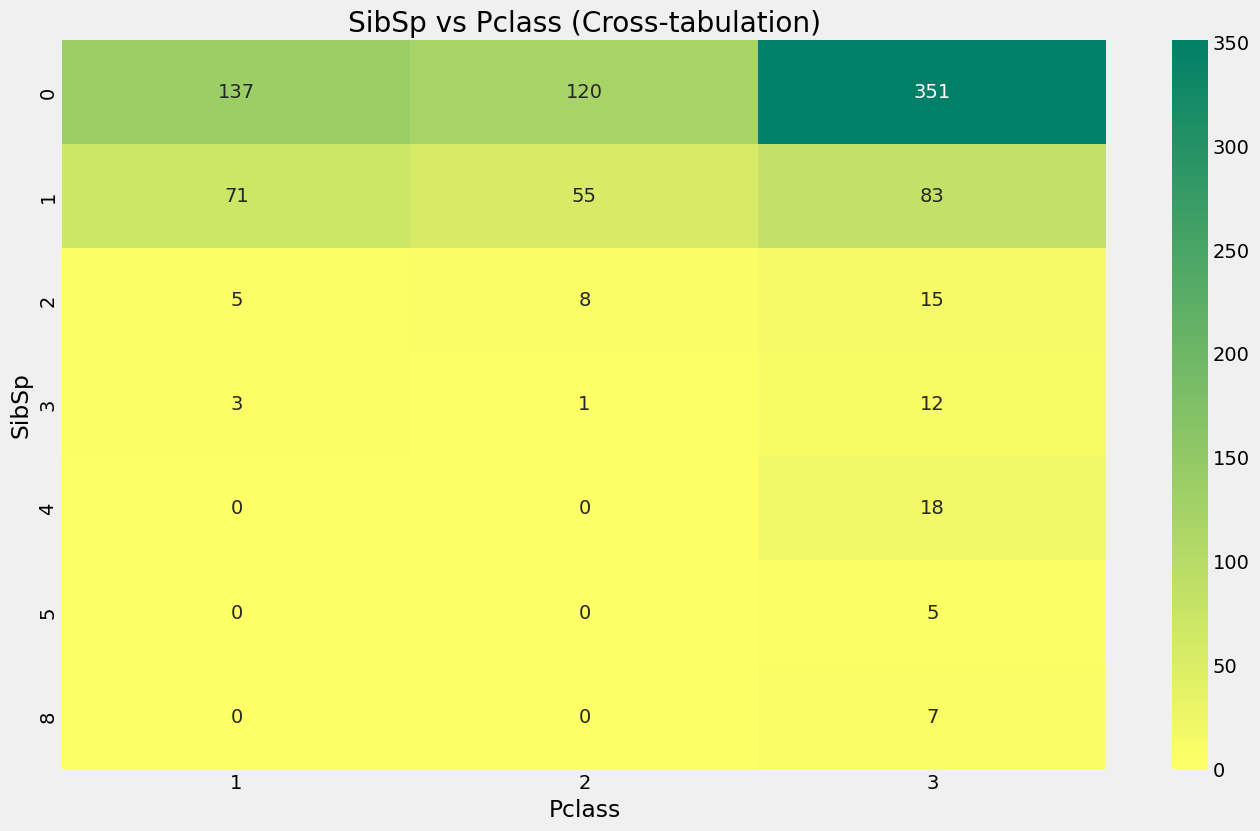

In [23]:
cross_tab = pd.crosstab(train_data.SibSp, train_data.Pclass)

# Create a heatmap
plt.figure(figsize=(15, 9))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='summer_r')
plt.title('SibSp vs Pclass (Cross-tabulation)')
plt.xlabel('Pclass')
plt.ylabel('SibSp')
plt.show()